référence:
GPT-3

# Financial Inclusion in Africa Starter Notebook


- **Quel est l'objectif principal ? Dans quel contexte ? (SMART)**
  - L'objectif principal est de créer un modèle d'apprentissage automatique capable de prédire les individus les plus susceptibles de posséder ou d'utiliser un compte bancaire. Cet objectif est SMART car il est spécifique aux pays africains spécifiés (Kenya, Rwanda, Tanzanie, Ouganda), mesurable par la prédiction de la possession d'un compte bancaire, atteignable grâce à l'apprentissage automatique, réaliste dans le contexte financier africain, et temporellement défini par la durée du défi.

- **Quelle valeur cela ajoute-t-il ? (analyse coût-bénéfice, inclure la maintenance)**
  - La création de ce modèle ajoute une valeur significative en fournissant une indication de l'état de l'inclusion financière et en identifiant des facteurs clés déterminant la sécurité financière des individus. L'analyse coût-bénéfice doit considérer l'impact potentiel sur le développement économique à long terme. La maintenance du modèle est cruciale pour assurer sa durabilité et son utilité continue dans un contexte en évolution.

- **Peut-on le résoudre sans apprentissage automatique ? Est-ce réalisable ?**
  - Non, résoudre ce défi de manière précise nécessite l'utilisation de l'apprentissage automatique, en raison de la complexité des données et de la nécessité de prédire des comportements individuels.

- **Avons-nous suffisamment de données de qualité ? (correctes, représentatives, puissance prédictive)**
  - Une évaluation approfondie de la qualité des données est nécessaire. Les données doivent être correctes, représentatives de la population adulte de ces pays, et avoir une puissance prédictive suffisante pour garantir la validité du modèle.

**Objectif technique :**

- **Quel est l'objectif du modèle (mesurable) ? Quelle est la métrique de réussite/échec ?**
  - L'objectif mesurable est de prédire la probabilité qu'un individu ait ou n'ait pas un compte bancaire. La métrique de réussite/échec est l'erreur absolue moyenne, où 1 indique que l'individu a un compte bancaire et 0 indique qu'il n'en a pas.

- **Quelles sont les entrées et sorties du modèle ?**
  - Les entrées du modèle comprennent les données d'inclusion financière en Afrique, et la sortie consiste en la prédiction de la possession d'un compte bancaire pour chaque individu.

- **Quelle est la mesure de performance ?**
  - La mesure de performance est basée sur l'erreur absolue moyenne, permettant d'évaluer la précision du modèle dans ses prédictions par rapport à la réalité.

- **Quels sont les références non liées à l'apprentissage automatique ?**
  - Les références non liées à l'apprentissage automatique incluent les méthodes traditionnelles d'évaluation de l'inclusion financière, basées sur l'accès aux comptes bancaires, servant de base de comparaison pour évaluer l'efficacité du modèle d'apprentissage automatique.

### Importing libraries

In [1]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency

from google.colab import files
import warnings
warnings.filterwarnings('ignore')

### 1. Load the dataset

In [2]:
# !gdown 16tGDllJBdaMw0gzIsHb1UHpz4FV8yMGC

In [3]:
# !gdown 1Px_7tGgC4CsvpHsBsLncBGWS4pf0w1ua

In [4]:
# !gdown 1MJD_GLTd0-1xo1pVByAfuA5kwKy3Dxv4

In [5]:
# !gdown 1B0giDjNOcbjLHRUblSlrfx13EELRUUtH

In [6]:
!wget https://drive.google.com/uc?id=1E-cjwcAarIgz65-rbdtjU18wdrNxyF2M -O financial_inclusion.zip
!unzip financial_inclusion.zip

--2024-01-11 20:07:22--  https://drive.google.com/uc?id=1E-cjwcAarIgz65-rbdtjU18wdrNxyF2M
Resolving drive.google.com (drive.google.com)... 142.251.2.139, 142.251.2.138, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1E-cjwcAarIgz65-rbdtjU18wdrNxyF2M [following]
--2024-01-11 20:07:22--  https://drive.usercontent.google.com/download?id=1E-cjwcAarIgz65-rbdtjU18wdrNxyF2M
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 768493 (750K) [application/octet-stream]
Saving to: ‘financial_inclusion.zip’

financial_inclusion 100%[===================>] 750.48K  --.-KB/s    in 0.1s    

2024-01-11 20:07:24 (6.17

In [7]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
variables = pd.read_csv('VariableDefinitions.csv')
ss = pd.read_csv('SampleSubmission.csv')

In [8]:
# Observons la forme de nos ensembles de données.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [9]:
# Examiner les données d'entraînement
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [10]:
# Vérifier les valeurs manquantes
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


2. Comprendre l'ensemble de données

In [11]:
# Afficher quelques informations sur l'ensemble de données
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Le DataFrame en question présente 23 524 entrées et 13 colonnes, avec des données couvrant des informations telles que le pays, l'année, le type de localisation, l'accès au téléphone portable, la taille du ménage, l'âge du répondant, le genre, la relation avec le chef de ménage, le statut matrimonial, le niveau d'éducation et le type d'emploi. Les types de données comprennent des entiers (year, household_size, age_of_respondent) et des objets (country, uniqueid, bank_account, location_type, cellphone_access, gender_of_respondent, relationship_with_head, marital_status, education_level, job_type).

In [12]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


Définitions des variables

- **country :** Pays où se trouve la personne interrogée.
- **year :** Année de réalisation de l'enquête.
- **uniqueid :** Identifiant unique pour chaque personne interrogée.
- **location_type :** Type de lieu : Rural, Urbain.
- **cellphone_access :** Si la personne interrogée a accès à un téléphone portable : Oui, Non.
- **household_size :** Nombre de personnes vivant dans un même foyer.
- **age_of_respondent :** Âge de la personne interrogée.
- **gender_of_respondent :** Genre de la personne interrogée : Masculin, Féminin.
- **relationship_with_head :** Relation de la personne interrogée avec le chef du ménage : Chef de ménage, Conjoint, Enfant, Parent, Autre parent, Autre non parent, Ne sait pas.
- **marital_status :** Statut matrimonial de la personne interrogée : Marié/vivant ensemble, Divorcé/séparé, Veuf(ve), Célibataire/jamais marié(e), Ne sait pas.
- **education_level :** Niveau d'éducation le plus élevé : Aucune éducation formelle, Éducation primaire, Éducation secondaire, Formation professionnelle/spécialisée, Éducation tertiaire, Autre/Ne sait pas/À déterminer.
- **job_type :** Type d'emploi de la personne interrogée : Agriculture et pêche, Travailleur indépendant, Employé formel dans le secteur public, Employé formel dans le secteur privé, Travailleur informel, Dépendant des envois de fonds, Dépendant du gouvernement, Autre revenu, Aucun revenu, Ne sait pas/Refuse de répondre.

### 3. Data analysis

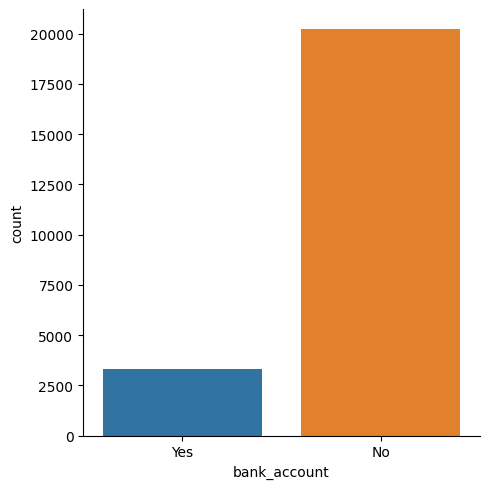

In [13]:
# Explorer la distribution de la variable cible
sns.catplot(x="bank_account", kind="count", data=train)

In [14]:
# Convertir la cible en données numériques
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']


In [15]:
y_train

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

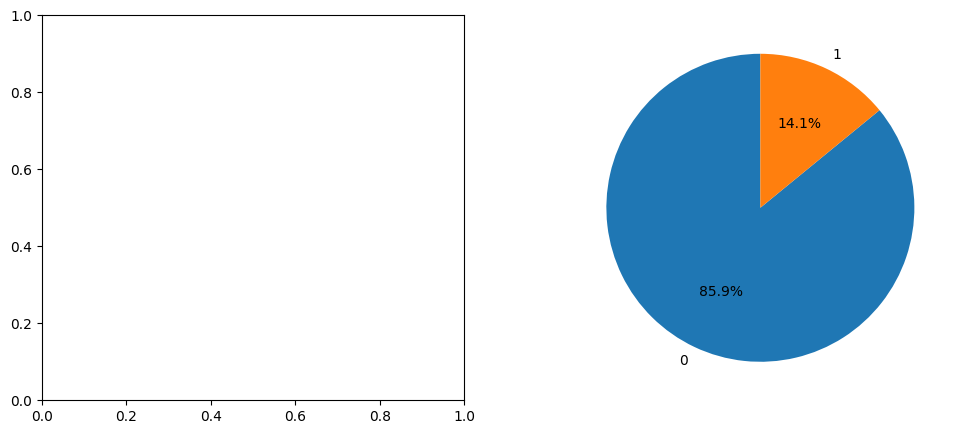

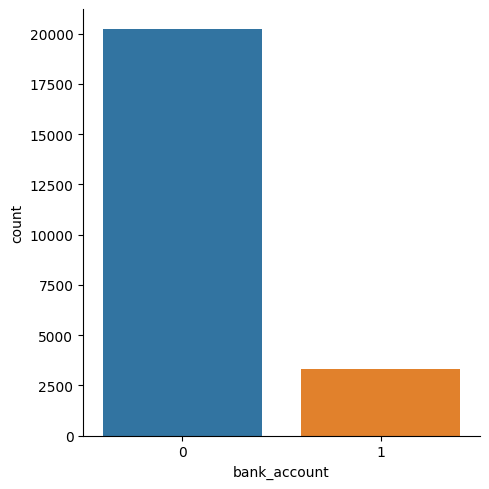

In [16]:
# Utiliser sns.catplot pour afficher la distribution de la variable cible
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphique circulaire
y_train.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1])
axes[1].set_ylabel('')  # Supprimer le libellé inutile

# Graphique catégoriel
sns.catplot(x="bank_account", kind="count", data=train, ax=axes[0])



# Ajuster l'affichage
plt.show()


In [17]:
y_train.value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

### 4. Préparation des données


In [18]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# function to preprocess our data for training models
def preprocessing_data(data):

    # Convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)

    # Categorical features to be converted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    le = LabelEncoder()
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # Drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # Scale our data into the range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[data.columns] = scaler.fit_transform(data[data.columns])

    return data



In [19]:
# preprocess the train data
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [20]:
# shape of the processed train set
print(processed_train.shape)

(23524, 37)


### 5. Modéliser l’entraînement et l’évaluation

In [21]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y_train, stratify = y_train,
                                                  test_size = 0.1, random_state=42)

In [22]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.11177220569485757


In [24]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'gamma': 1, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.8}


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.11177220569485757


In [26]:
###6. Making the first submission

In [27]:
# Get the predicted result for the test Data
test.bank_account = xgb_model.predict(processed_test)

In [28]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [29]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
5950,uniqueid_12085 x Rwanda,0
6286,uniqueid_12421 x Rwanda,1
2026,uniqueid_8095 x Kenya,1
7034,uniqueid_7309 x Tanzania,0
3906,uniqueid_10041 x Rwanda,0


In [30]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
files.download('first_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
df = pd.read_csv('first_submission.csv')

In [32]:
df

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0


#OPTUNA

In [33]:
pip install optuna

y


In [34]:
import optuna

def objective(trial):
    param = {
        "max_depth": trial.suggest_int("max_depth", 3, 7),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 3),
        # Add other parameters here
    }

    model = XGBClassifier(**param)
    model.fit(X_Train, y_Train)
    accuracy = accuracy_score(y_val, model.predict(X_Val))
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

print(study.best_trial)

[I 2024-01-11 20:08:40,804] A new study created in memory with name: no-name-86d6c760-8876-4763-b4e3-f04840c62138
[I 2024-01-11 20:08:41,028] Trial 0 finished with value: 0.8882277943051424 and parameters: {'max_depth': 3, 'min_child_weight': 3}. Best is trial 0 with value: 0.8882277943051424.
[I 2024-01-11 20:08:41,251] Trial 1 finished with value: 0.8916277093072673 and parameters: {'max_depth': 4, 'min_child_weight': 1}. Best is trial 1 with value: 0.8916277093072673.
[I 2024-01-11 20:08:41,579] Trial 2 finished with value: 0.8882277943051424 and parameters: {'max_depth': 7, 'min_child_weight': 1}. Best is trial 1 with value: 0.8916277093072673.
[I 2024-01-11 20:08:41,874] Trial 3 finished with value: 0.8916277093072673 and parameters: {'max_depth': 7, 'min_child_weight': 3}. Best is trial 1 with value: 0.8916277093072673.
[I 2024-01-11 20:08:42,085] Trial 4 finished with value: 0.8873778155546111 and parameters: {'max_depth': 3, 'min_child_weight': 2}. Best is trial 1 with value: 0

FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.8916277093072673], datetime_start=datetime.datetime(2024, 1, 11, 20, 8, 41, 29890), datetime_complete=datetime.datetime(2024, 1, 11, 20, 8, 41, 251219), params={'max_depth': 4, 'min_child_weight': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=7, log=False, low=3, step=1), 'min_child_weight': IntDistribution(high=3, log=False, low=1, step=1)}, trial_id=1, value=None)


#Hyperopt

In [35]:
from hyperopt import hp, fmin, tpe, STATUS_OK

space = {
    "max_depth": hp.choice("max_depth", [3, 5, 7]),
    "min_child_weight": hp.choice("min_child_weight", [1, 2, 3]),
    # Add other parameters here
}

def objective(params):
    model = XGBClassifier(**params)
    model.fit(X_Train, y_Train)
    accuracy = accuracy_score(y_val, model.predict(X_Val))
    return {'loss': -accuracy, 'status': STATUS_OK}

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=10
)

print(best)

100%|██████████| 10/10 [00:04<00:00,  2.06trial/s, best loss: -0.8924776880577986]
{'max_depth': 1, 'min_child_weight': 0}


#BayesianOptimization:

In [36]:
!pip install colorama

In [37]:
from bayes_opt import BayesianOptimization


def xgb_evaluate(max_depth, min_child_weight):
    params = {'max_depth': int(max_depth), 'min_child_weight': int(min_child_weight)}
    model = XGBClassifier(**params)
    model.fit(X_Train, y_Train)
    accuracy = accuracy_score(y_val, model.predict(X_Val))
    return accuracy

optimizer = BayesianOptimization(
    f=xgb_evaluate,
    pbounds={"max_depth": (3, 7), "min_child_weight": (1, 3)},
    random_state=1,
)

optimizer.maximize(n_iter=10)

print(optimizer.max)

|   iter    |  target   | max_depth | min_ch... |
-------------------------------------------------
| 1         | 0.8908    | 4.668     | 2.441     |
| 2         | 0.8904    | 3.0       | 1.605     |
| 3         | 0.8904    | 3.587     | 1.185     |
| 4         | 0.8904    | 3.745     | 1.691     |
| 5         | 0.8908    | 4.587     | 2.078     |
| 6         | 0.8925    | 5.563     | 1.957     |
| 7         | 0.8882    | 6.415     | 1.734     |
| 8         | 0.8874    | 3.597     | 2.258     |
| 9         | 0.8874    | 3.344     | 2.517     |
| 10        | 0.8904    | 5.443     | 2.452     |
| 11        | 0.8925    | 5.247     | 1.671     |
| 12        | 0.8925    | 5.408     | 1.047     |
| 13        | 0.8916    | 4.758     | 1.0       |
| 14        | 0.8925    | 5.635     | 1.464     |
| 15        | 0.8916    | 7.0       | 3.0       |
{'target': 0.8924776880577986, 'params': {'max_depth': 5.5627153993693925, 'min_child_weight': 1.9573987987440984}}


#Scikit-Optimize:

In [40]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.2 MB/s eta 0:00:00


In [41]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assurez-vous que X_Train, y_Train, X_Val, et y_Val sont définis correctement

def objective(params):
    max_depth, min_child_weight = params
    model = XGBClassifier(max_depth=int(max_depth), min_child_weight=int(min_child_weight))
    model.fit(X_Train, y_Train)
    accuracy = accuracy_score(y_val, model.predict(X_Val))
    return -accuracy

space = [Integer(3, 7, name='max_depth'),
         Integer(1, 3, name='min_child_weight')]

res_gp = gp_minimize(objective, space, n_calls=10, random_state=0)
print("Best accuracy: %.4f" % (-res_gp.fun))
print("Best parameters:", res_gp.x)


Best accuracy: 0.8916
Best parameters: [4, 1]


## GPyOpt:

In [43]:
!pip install GPyOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 998.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83588 sha256=b7b9040ef2d8f597950ec2f7963daad6a11f49dea0d64c2fb280939b241b5ddc
  Stored in directory: /root/.cache/pip/wheels/72/17/52/9d818b4c60f733bf49d5cf82bc2758ebbdc57a0471137c37be
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3421237 sha256=2bd02e769c80d036bf1633c06960ae2383edb0dd7bbdc9232ca7283bff52c48b
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102543 sha256=5592b6869a94a23f3ab67a85

In [44]:
import GPyOpt

domain = [{'name': 'max_depth', 'type': 'discrete', 'domain': (3, 5, 7)},
          {'name': 'min_child_weight', 'type': 'discrete', 'domain': (1, 2, 3)}]

def objective(params):
    params = params[0]
    model = XGBClassifier(max_depth=int(params[0]), min_child_weight=int(params[1]))
    model.fit(X_Train, y_Train)
    accuracy = accuracy_score(y_val, model.predict(X_Val))
    return -accuracy

opt = GPyOpt.methods.BayesianOptimization(f=objective, domain=domain)
opt.run_optimization(max_iter=10)

print("Best parameters:", opt.x_opt)

Best parameters: [7. 3.]


#j